第四题：(使用Pytorch)

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn import datasets
import numpy as np

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris["data"].astype(np.float32) # X为(150,4)的array数组
y = iris["target"].astype(np.int64) # y为标签0,1,2

# 将数据分为训练集和测试集
train_ratio = 0.7
index = np.random.permutation(X.shape[0])
train_index = index[:int(X.shape[0] * train_ratio)]
test_index = index[int(X.shape[0] * train_ratio):]
X_train, y_train = X[train_index], y[train_index]
X_test, y_test = X[test_index], y[test_index]

# 定义神经网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        torch.manual_seed(2)
        self.fc1 = nn.Linear(4, 32) # 输入的神经元个数和输出神经元个数
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 初始化模型、损失函数和优化器
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    inputs = torch.from_numpy(X_train)
    labels = torch.from_numpy(y_train)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("Epoch: %d, Loss: %.4f" % (epoch, loss.item()))


# 评估模型
with torch.no_grad():
    inputs = torch.from_numpy(X_test)
    labels = torch.from_numpy(y_test)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1) # 获得outputs每行最大值的索引
    accuracy = (predictions == labels).float().mean() # (predictions == labels):输出值为bool的Tensor
    print("Accuracy: %.2f %%" % (accuracy.item() * 100))


Epoch: 0, Loss: 1.1044
Epoch: 10, Loss: 0.9732
Epoch: 20, Loss: 0.7501
Epoch: 30, Loss: 0.5151
Epoch: 40, Loss: 0.3853
Epoch: 50, Loss: 0.2987
Epoch: 60, Loss: 0.2268
Epoch: 70, Loss: 0.1750
Epoch: 80, Loss: 0.1412
Epoch: 90, Loss: 0.1202
Accuracy: 100.00 %


第五题：

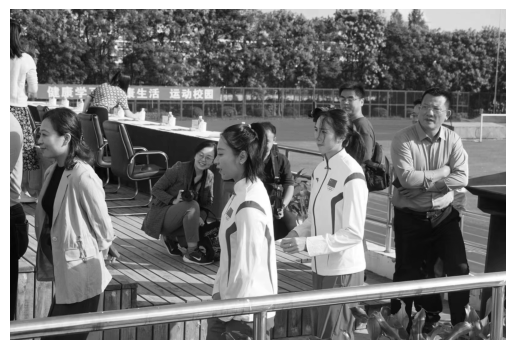

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# 读取图像-转化为灰度图片-转化为numpy数组
myima = Image.open("mypic.jpg")
myimgray = np.array(myima.convert("L"),dtype=np.float32)

#可视化图片
plt.imshow(myimgray,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

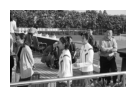

In [5]:
plt.figure(figsize=(2,1)) # 假设指定大小为（2,1）
plt.imshow(myimgray,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

第七题：见net.py

第八题：见train.py
